In [ ]:
# Reference: 
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras
# https://www.kaggle.com/code/heeraldedhia/mnist-classifier-first-deep-learning-project/notebook
# https://medium.com/fenwicks/tutorial-1-mnist-the-hello-world-of-deep-learning-abd252c47709
# https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

# https://www.kaggle.com/code/cdeotte/how-to-choose-cnn-architecture-mnist

In [ ]:
# https://www.kaggle.com/code/heeraldedhia/mnist-classifier-first-deep-learning-project/notebook

#Task and Goals:


1.   Run the basic train and find most feasible hyper parameters


> a) find feasible learning rate, activation and optimizer function, epoch size

> b) load the other test dataset excel to check the accuracy and save the predicted results in .csv


2.   Change the optimizer and on best model you tested
and do all the sub section of 1. (Repeat steps 6-9 again)



## (1) Import the required libraries

In [ ]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        
import keras

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils 

## (2) Load the Dataset

In [ ]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# print train and test set
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
# Read test image excel file for different testing scheme  
test_data = pd.read_csv('test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

## (3) Data Preprocessing

In [ ]:
# data sample resize
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

# typecasting pixel value as float 
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

# Normalize the sample image
X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
# Converting Categorical to Numerical
# assign class labling
no_classes = 10
Y_train = np_utils.to_categorical(y_train, no_classes)
Y_test = np_utils.to_categorical(y_test, no_classes)

## (4) Build Neural Network

In [ ]:
# 3 layer Dense FC Archietecture (shallow network)

model = Sequential()

# layer 
# 512 nodes with 784 input shapes
model.add(Dense(512, input_shape=(784,))) 
model.add(Activation('relu'))

#drop out 20% nodes
model.add(Dropout(0.2))

# layer 2
# 512 nodes with 'relu' activation
model.add(Dense(512))
model.add(Activation('relu'))

#drop out 20% nodes
model.add(Dropout(0.2))

# layer 3
# number of class = number of nodes in last layer 
model.add(Dense(10))

# softmax activation for categorical data
model.add(Activation('softmax'))

## (5) Model Details

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 activation_7 (Activation)   (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

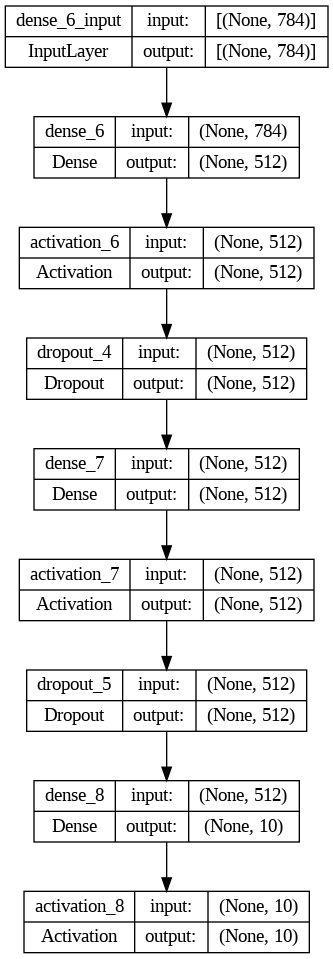

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

# (a) Task 1: Find the hyperparameters for base model 

## (6) Run the model

In [ ]:
# optimizer adam with lr = 0.00003 and categorical_crossentropy loss function

opt = keras.optimizers.Adam(learning_rate=0.00003)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# run the model for mini batch size = 128, epoch 20
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1)

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0509 - accuracy: 0.9845
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0495 - accuracy: 0.9847
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0480 - accuracy: 0.9854
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0460 - accuracy: 0.9863
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0451 - accuracy: 0.9865
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0440 - accuracy: 0.9868
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0437 - accuracy: 0.9867
Epoch 8/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0424 - accuracy: 0.9877
Epoch 9/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0412 - accuracy: 0.9877
Epoch 10/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0408 - accura

## (7) Evaluate the model



In [ ]:
# check the accuracy
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9819
Test accuracy: 0.9818999767303467


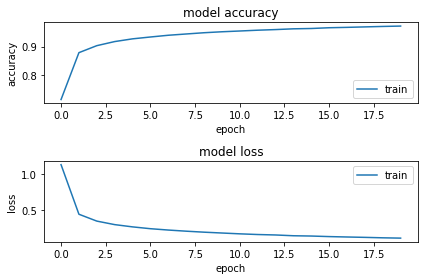

In [ ]:
# plot loss and accuracy trends

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [ ]:

# predict the class image data (unknown) from excel for each Image id

results = model.predict(test_data)
# preprocess to save the predicted image class in csv according to Image id
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Predicted")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)


1499/1499 [==============================] - 4s 3ms/step


In [ ]:
# find missing value
submission.isna().sum()

ImageId      19961
Predicted        0
dtype: int64

In [ ]:
# drop missing data
submission.drop(submission[submission['ImageId'].isna()].index, inplace=True)

In [ ]:
# save the predicted image class in csv according to Image id
submission.to_csv("submission.csv",index=False)

In [ ]:
# preview the tested sample with predicted class
submission

,ImageId,Predicted
0,1.0,2
1,2.0,0
2,3.0,9
3,4.0,9
4,5.0,3
...,...,...
27995,27996.0,7
27996,27997.0,4
27997,27998.0,3
27998,27999.0,0


In [ ]:
# take predicon result to check correct and incorrect classification
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes,axis = 1)

313/313 [==============================] - 1s 3ms/step


## (8) Evaluate correctly classified data

In [ ]:
# Checker conition for correctly classified data
correct_indices = np.nonzero(predicted_classes == y_test)[0]

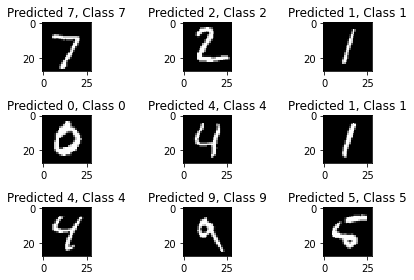

In [ ]:
# plot some random images with correctly classified results 
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

# (9) Find incorrectly classified sample

In [ ]:
# checking critera for incorrectly classified data
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

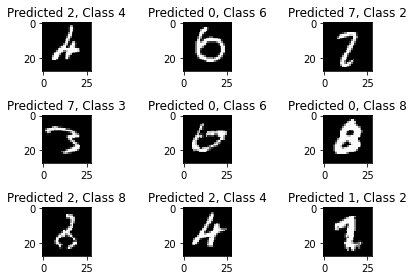

In [ ]:
# plot incorrectly classified data
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

# Task 2: Change the optimizer and evaluate

## (6.1) Run the model with RMSProp

In [ ]:
# optimizer = RMSPop with lr = 0.00003 and categorical_crossentropy loss function

opt = keras.optimizers.RMSprop(learning_rate=0.00003)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# run the model for mini batch size = 128, epoch 20

history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0139 - accuracy: 0.9959
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0138 - accuracy: 0.9960
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0140 - accuracy: 0.9960
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0127 - accuracy: 0.9964
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0136 - accuracy: 0.9960
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0119 - accuracy: 0.9964
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 8/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0123 - accuracy: 0.9964
Epoch 9/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0121 - accuracy: 0.9964
Epoch 10/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0119 - accura

## (7.1) Evaluate the model

In [ ]:
# check the accuracy

score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9834
Test accuracy: 0.9833999872207642


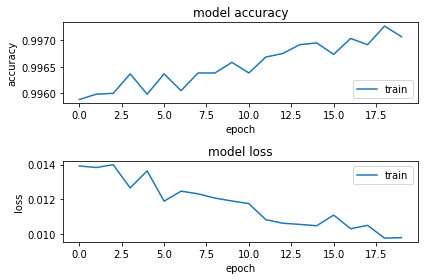

In [ ]:
# plot loss and accuracy trends

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:

# predict the class image data (unknown) from excel for each Image id

results = model.predict(test_data)
# preprocess to save the predicted image class in csv according to Image id
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Predicted")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)


1499/1499 [==============================] - 4s 3ms/step


In [ ]:
# find missing value
submission.isna().sum()

ImageId      19961
Predicted        0
dtype: int64

In [ ]:
# drop missing data
submission.drop(submission[submission['ImageId'].isna()].index, inplace=True)

In [ ]:
# save the predicted image class in csv according to Image id
submission.to_csv("submission.csv",index=False)

In [ ]:
# preview the tested sample with predicted class
submission

,ImageId,Predicted
0,1.0,2
1,2.0,0
2,3.0,9
3,4.0,0
4,5.0,3
...,...,...
27995,27996.0,7
27996,27997.0,4
27997,27998.0,5
27998,27999.0,0


In [ ]:
# take predicon result to check correct and incorrect classification
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes,axis = 1)

313/313 [==============================] - 1s 3ms/step


## (8.1) Evaluate correctly classified data

In [ ]:
# Checker conition for correctly classified data
correct_indices = np.nonzero(predicted_classes == y_test)[0]

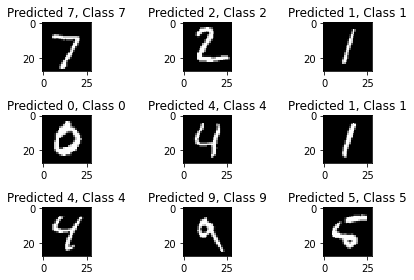

In [ ]:
# plot some random images with correctly classified results 
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

In [ ]:
# Checker conition for incorrely classified data
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

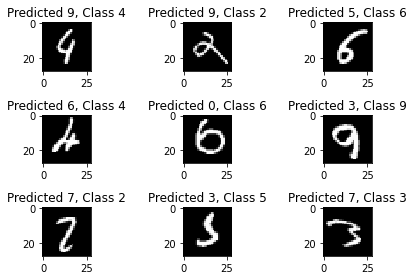

In [ ]:
# plot incorrectly classified data
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()